# TP2
### Problema 1

Um  programa imperativo pode ser descrito por um modelo do tipo Control Flow Automaton (CFA) como ilustrado no exemplo seguinte

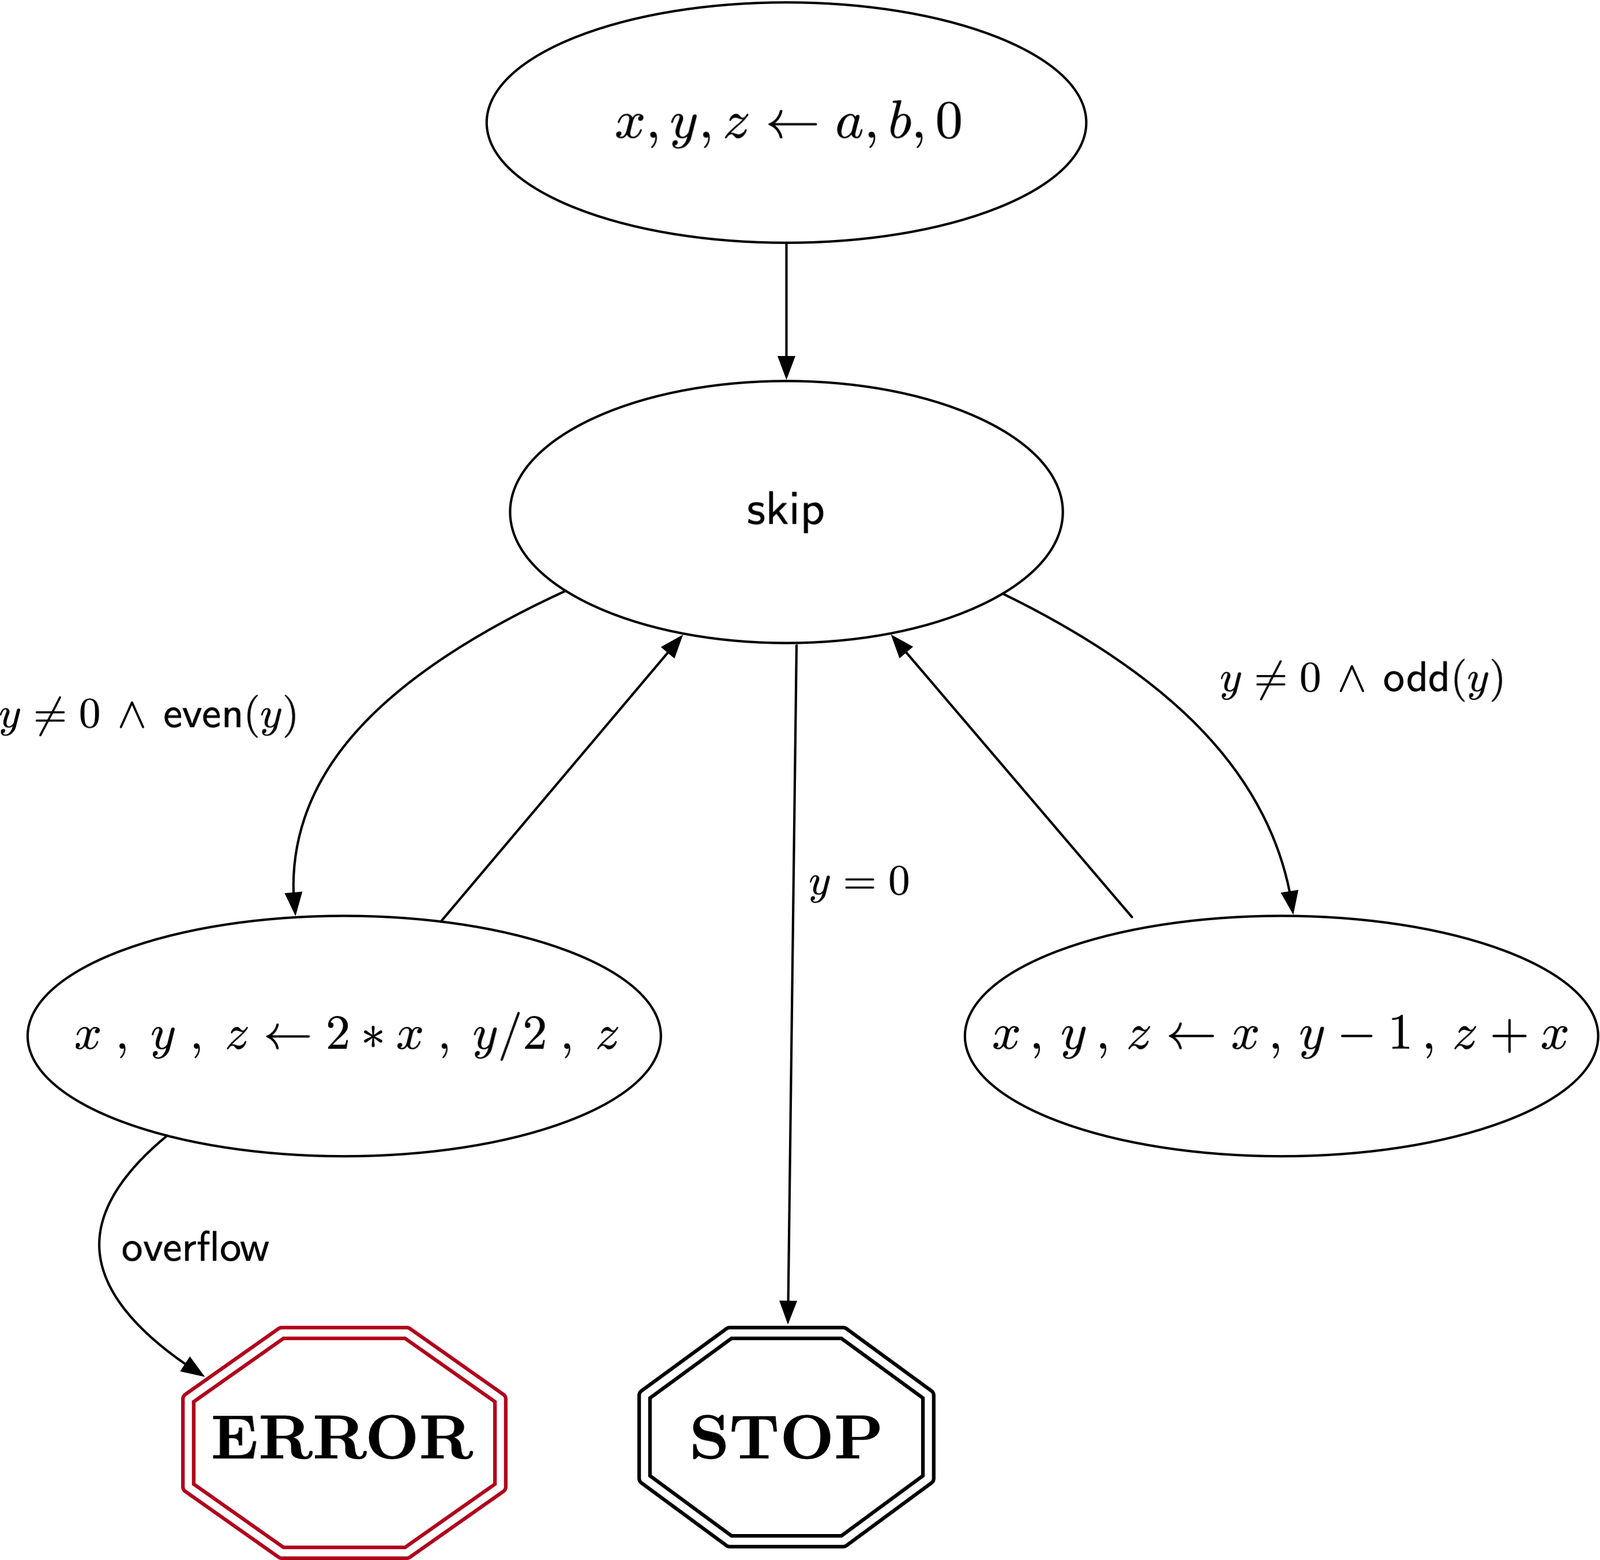

Este programa implementa a multiplicação de dois inteiros $\,a,b$, fornecidos como “input”, e com precisão limitada a $\,n\,$ bits (fornecido como parâmetro do programa). Note-se que:
- Existe a possibilidade de alguma das operações do programa produzir um erro de “overflow”;
<br>
<br>
- Os nós do grafo representam ações que actuam sobre os “inputs” do nó e produzem um “output” com as operações indicadas;
<br>
<br>
- Os ramos do grafo representam ligações que transferem o “output” de um nodo para o “input” do nodo seguinte. Esta transferência é condicionada pela satisfação da condição associada ao ramo;

### Implementação
Comecemos por importar a biblioteca `pysmt.shortcuts` que disponibiliza funcionalidades para a utilização de um SMT solver, assim como, a biblioteca `pysmt.typing` de onde temos que importar o tipo `INT`.

In [1]:
from pysmt.shortcuts import *
from pysmt.typing import INT

Entretanto, passemos à definição da função que cria a i-ésima cópia das variáveis de estado, agrupadas num dicionário.

In [2]:
def declare(i):
    state = {}
    state['nodo'] = Symbol('nodo'+str(i), INT)
    state['x'] = Symbol('x'+str(i), INT)
    state['y'] = Symbol('y'+str(i), INT)
    state['z'] = Symbol('z'+str(i), INT)
    
    return state

### Modelação de predicados
O estado inicial é caracterizado pelo seguinte predicado:
$$ nodo = 0 \land z = 0 $$
<br>
<br>
As transições possíveis no FOTS são caracterizadas pelo seguinte predicado:
##### nodo -> estado em que se encontra
##### nodo' -> próximo estado
$$ (nodo = 0 \land (y \neq 0 \land even(y) ) \land nodo' = 1 \land x' = x \land y' = y \land z' = z) $$
$$\lor$$
$$ (nodo = 0 \land (y \neq 0 \land odd(y) ) \land nodo' = 2 \land x' = x \land y' = y \land z' = z) $$
$$\lor$$
$$ (nodo = 0 \land y = 0 \land nodo' = 4 \land x' = x \land y' = y \land z' = z) $$
$$\lor$$
$$ (nodo = 1 \land nodo' = 0 \land x' = 2 * x \land y' = y\,/\, 2 \land z' = z $$
$$\lor$$
$$ (nodo = 1 \land nodo' = 3 \land overflow) $$
$$\lor$$
$$ (nodo = 2 \land nodo' = 0 \land x' = x \land y' = y - 1 \land z' = z + x) $$
$$\lor$$
$$ (nodo = 3 \land nodo' = 3 \land x' = x \land y' = y \land z' = z) $$
$$\lor$$
$$ (nodo = 4 \land nodo' = 4 \land x' = x \land y' = y \land z' = z) $$
<br>
<br>
De seguida, definimos as funções `odd` e `even` que verificam se um dado número passado como argumento é ímpar ou par, respetivamente.

In [11]:
def odd(num):
    
    if num % 2 == 0:
        return False
    else:
        return True
    

def even(num):
    if num % 2 == 0:
        return True
    else: 
        return False

A função `inicializacao` testa se um dado estado cumpre a condição para ser estado inicial.

In [12]:
def inicializacao(state):
    return And(Equals(state['nodo'], Int(0)), Equals(state['z'], Int(0)))

Dados dois estados, a função `transicao` testa se é possível transitar do primeiro estado para o segundo estado.

In [13]:
def transicao(curr, prox):
    c1 = And(
            Equals(curr['nodo'], Int(0)),
            NotEquals(curr['y'], Int(0)),
            even(curr['y']),
            Equals(prox['nodo'], Int(1)),
            Equals(prox['x'], curr['x']),
            Equals(prox['y'], curr['y']),
            Equals(prox['z'], curr['z']))
    
    c2 = And(
            Equals(curr['nodo'], Int(0)),
            NotEquals(curr['y'], Int(0)),
            odd(curr['y']),
            Equals(prox['nodo'], Int(2)),
            Equals(prox['x'], curr['x']),
            Equals(prox['y'], curr['y']),
            Equals(prox['z'], curr['z']))
    
    c3 = And(
            Equals(curr['nodo'], Int(0)),
            Equals(curr['y'], Int(0)),
            Equals(prox['nodo'], Int(4)),
            Equals(prox['x'], curr['x']),
            Equals(prox['y'], curr['y']),
            Equals(prox['z'], curr['z']))
    
    c4 = And(
            Equals(curr['nodo'], Int(1)),
            Equals(prox['nodo'], Int(0)),
            Equals(prox['x'], curr['x'] * 2),
            Equals(prox['y'], curr['y'] / 2),
            Equals(prox['z'], curr['z']))
    
    c5 = And(
            Equals(curr['nodo'], Int(1)),
            Equals(prox['nodo'], Int(3)),
            overflow())
    
    c6 = And(
            Equals(curr['nodo'], Int(2)),
            Equals(prox['nodo'], Int(0)),
            Equals(prox['x'], curr['x']),
            Equals(prox['y'], curr['y'] - 1),
            Equals(prox['z'], curr['z'] + curr['x']))
    
    c7 = And(
            Equals(curr['nodo'], Int(3)),
            Equals(prox['nodo'], Int(3)),
            Equals(prox['x'], curr['x']),
            Equals(prox['y'], curr['y']),
            Equals(prox['z'], curr['z']))
    
    c8 = And(
            Equals(curr['nodo'], Int(4)),
            Equals(prox['nodo'], Int(4)),
            Equals(prox['x'], curr['x']),
            Equals(prox['y'], curr['y']),
            Equals(prox['z'], curr['z']))
   
    return Or(c1, c2, c3, c4, c5, c6, c7, c8)